In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

from utils.wrangle import wrangle


df = pd.read_csv('data/commodity_prices.csv')
df = wrangle(df)

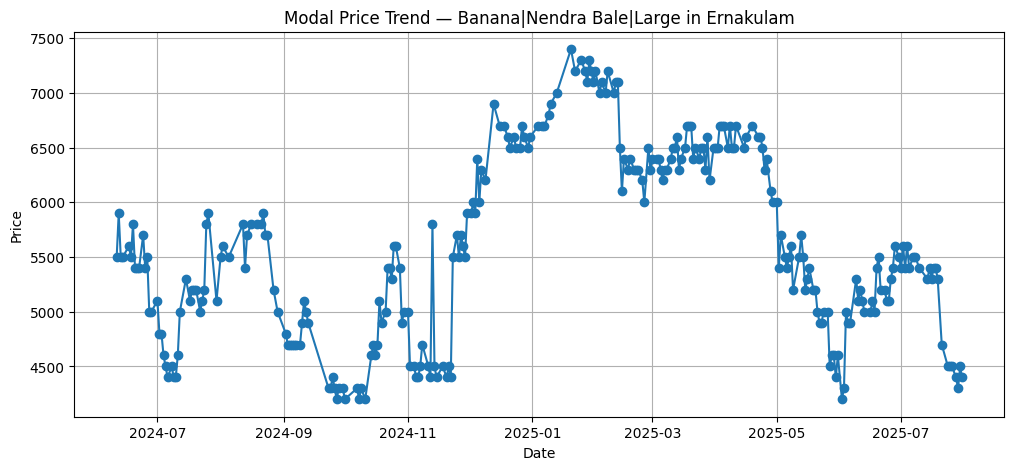

In [6]:
df_sub = df[(df['Product_Type'] == "Banana|Nendra Bale|Large") & (df['Market'] == "Ernakulam")]
df_sub = df_sub.sort_values('Arrival_Date')
df_sub = df_sub.set_index('Arrival_Date')

# Plot raw time series
plt.figure(figsize=(12,5))
plt.plot(df_sub['Modal_Price'], marker='o')
plt.title(f'Modal Price Trend — Banana|Nendra Bale|Large in Ernakulam')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()